In [1]:
from pathlib import Path
import duckdb
import polars as pl
from time import perf_counter
import matplotlib.pyplot as plt
import seaborn as sns
import psutil


def memory_used(old=0):
    mem = psutil.Process().memory_full_info().uss / (1024 ** 2)
    print(f"Memory used: {mem - old:,.0f} MB, current: {mem:,.0f} MB")
    return mem


file_path = Path.home() / 'OneDrive - Seagroup/ai/kaggle_dataset/large_scale/2021_Yellow_Taxi_Trip_Data.csv'

In [2]:
%load_ext sql
%sql duckdb://
mem = memory_used()

Memory used: 184 MB, current: 184 MB


In [3]:
query = f"""
SELECT *
FROM read_csv_auto('{file_path}')
"""
start = perf_counter()
result = duckdb.query(query).df()
print(f'Read data by DuckDB: {perf_counter() - start:,.2f}s')
mem = memory_used(mem)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Read data by DuckDB: 8.94s
Memory used: 6,073 MB, current: 6,257 MB


4.260656000000381
Memory used: 171 MB, current: 6,428 MB


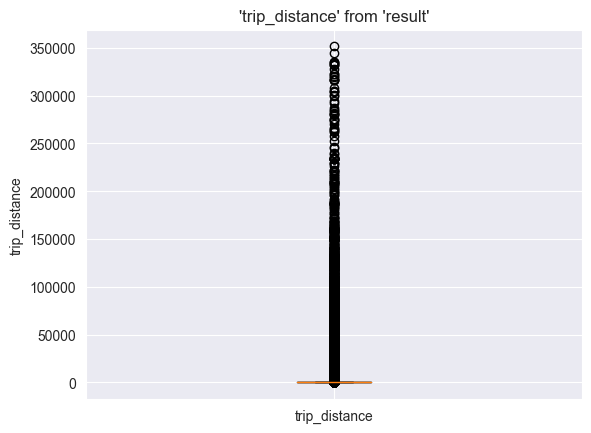

In [4]:
start = perf_counter()
%sqlplot boxplot --column trip_distance --table result
print(perf_counter() - start)
mem = memory_used(mem)

In [5]:
%%sql
select * from result

Running query in 'duckdb://'

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.1,1.0,N,142,43,2.0,8.0,3.0,0.5,0.0,0.0,0.3,11.8,2.5
1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.2,1.0,N,238,151,2.0,3.0,0.5,0.5,0.0,0.0,0.3,4.3,0.0
1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.7,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.6,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5
1.0,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.6,1.0,N,224,68,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5
1.0,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.1,1.0,N,95,157,2.0,16.0,0.5,0.5,0.0,0.0,0.3,17.3,0.0
1.0,2021-01-01 00:12:29,2021-01-01 00:30:34,1.0,5.7,1.0,N,90,40,2.0,18.0,3.0,0.5,0.0,0.0,0.3,21.8,2.5
1.0,2021-01-01 00:39:16,2021-01-01 01:00:13,1.0,9.1,1.0,N,97,129,4.0,27.5,0.5,0.5,0.0,0.0,0.3,28.8,0.0
1.0,2021-01-01 00:26:12,2021-01-01 00:39:46,2.0,2.7,1.0,N,263,142,1.0,12.0,3.0,0.5,3.15,0.0,0.3,18.95,2.5


In [6]:
start = perf_counter()
df = pl.read_csv(file_path)
print(f'Read data by Polars: {perf_counter() - start:,.2f}s')
mem = memory_used(mem)

Read data by Polars: 2.29s
Memory used: 13,343 MB, current: 19,771 MB


1.0499465000002601
Memory used: 159 MB, current: 19,930 MB


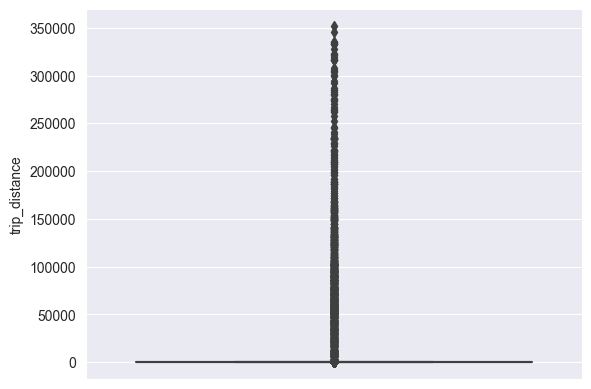

In [7]:
start = perf_counter()
sns.boxplot(data=result, y='trip_distance')
print(perf_counter() - start)
mem = memory_used(mem)

0.8743617000000086
Memory used: 1 MB, current: 19,931 MB


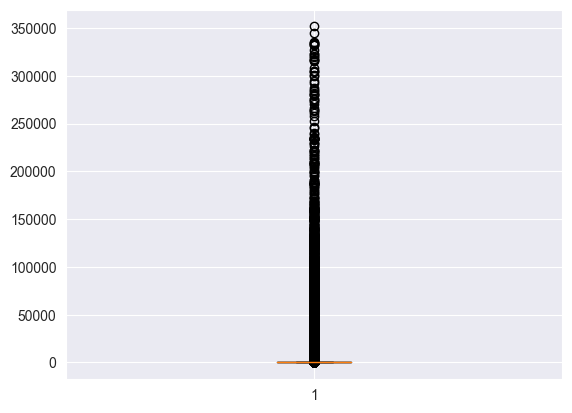

In [8]:
start = perf_counter()
plt.boxplot(result.trip_distance)
print(perf_counter() - start)
mem = memory_used(mem)